# Forecasting Sticker Sales

### Name: Talimul Islam Utsha


[Data](https://www.kaggle.com/competitions/playground-series-s5e1/data)


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


In [37]:
# importing datset
df_train= pd.read_csv('train.csv')
df_test= pd.read_csv('test.csv')
submission= pd.read_csv('sample_submission.csv')

In [38]:
df_train.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [39]:
df=df_train.copy()

## Lets explore the data


In [40]:
# shape of the dataset
df.shape



(230130, 6)

In [41]:
df.isnull().sum()

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

In [42]:
df.describe()

,id,num_sold
count,230130.000000,221259.000000
mean,115064.500000,752.527382
std,66432.953062,690.165445
min,0.000000,5.000000
25%,57532.250000,219.000000
50%,115064.500000,605.000000
75%,172596.750000,1114.000000
max,230129.000000,5939.000000


In [43]:
df.columns

Index(['id', 'date', 'country', 'store', 'product', 'num_sold'], dtype='object')

In [44]:

# Display unique values of the "Country" column
unique_countries = df_train['country'].unique()
print("Unique values in the 'Country' column:", unique_countries)

Unique values in the 'Country' column: ['Canada' 'Finland' 'Italy' 'Kenya' 'Norway' 'Singapore']


In [45]:

# Display unique values of the "Store" column
unique_stores = df_train['store'].unique()
print("Unique values in the 'Store' column:", unique_stores)

Unique values in the 'Store' column: ['Discount Stickers' 'Stickers for Less' 'Premium Sticker Mart']


In [46]:

# Display unique values of the "Product" column
unique_products = df_train['product'].unique()
print("Unique values in the 'Product' column:", unique_products)

Unique values in the 'Product' column: ['Holographic Goose' 'Kaggle' 'Kaggle Tiers' 'Kerneler'
 'Kerneler Dark Mode']


In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score

# Assuming you have already loaded your DataFrame as df_train

# Step 1: Prepare the data
# Fill missing values temporarily for model training
df_train['num_sold'].fillna(-1, inplace=True)  # Temporary fill for model training

# Encode categorical variables
label_encoders = {}
for column in ['country', 'store', 'product']:  # Encode relevant categorical columns
    le = LabelEncoder()
    df_train[column] = le.fit_transform(df_train[column].astype(str))
    label_encoders[column] = le

# Step 2: Define features and target
X = df_train[['country', 'store', 'product']]  # Features
y = df_train['num_sold']  # Target

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 5: Predict missing values in the "num_sold" column
missing_indices = df_train[df_train['num_sold'] == -1].index
if len(missing_indices) > 0:
    # Prepare the data for prediction
    X_missing = df_train.loc[missing_indices, ['country', 'store', 'product']]
    
    # Ensure that X_missing is not empty
    if not X_missing.empty:
        predicted_num_sold = model.predict(X_missing)

        # Fill in the missing values
        df_train.loc[missing_indices, 'num_sold'] = predicted_num_sold
    else:
        print("No data available for num_sold prediction.")
else:
    print("No missing 'num_sold' values to impute.")

# Step 6: Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error for num_sold Prediction:", mae)
print("R² Score for num_sold Prediction:", r2)

Mean Absolute Error for num_sold Prediction: 97.06391370776541
R² Score for num_sold Prediction: 0.943469571608159


In [48]:
df_train.isnull().sum()

id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [49]:
!pip install numpy pandas scikit-learn xgboost

In [50]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge  # Corrected import
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

### Best model selection (Machine learning)

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import mean_absolute_error, r2_score
# from sklearn.preprocessing import LabelEncoder
# import xgboost as xgb

# # Assuming you have already loaded your DataFrame as df_train and filled missing values in 'num_sold'

# # Prepare the data
# X = df_train[['country', 'store', 'product']]  # Features
# y = df_train['num_sold']  # Target

# # Encode categorical variables
# label_encoders = {}
# for column in ['country', 'store', 'product']:  # Encode relevant categorical columns
#     le = LabelEncoder()
#     X[column] = le.fit_transform(X[column].astype(str))
#     label_encoders[column] = le

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define models and their hyperparameter grids
# models = {
#     'Random Forest': (RandomForestRegressor(random_state=42), {
#         'n_estimators': [20],
#         'max_depth': [20],
#         'min_samples_split': [2],
#         'min_samples_leaf': [1],
#     }),
#     'Support Vector Regression': (SVR(), {
#         'kernel': ['rbf'],
#         'C': [1.0],
#         'gamma': ['scale']
#     }),
#     'XGBoost': (xgb.XGBRegressor(random_state=42), {
#         'n_estimators': [100],
#         'max_depth': [5],
#         'learning_rate': [0.1],
#         'subsample': [1.0]
#     }),
# }

# # Store results
# results = []

# # Iterate through models
# for model_name, (model, param_grid) in models.items():
#     # Create the GridSearchCV object
#     grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
#                                scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, verbose=2)
    
#     # Fit the model
#     grid_search.fit(X_train, y_train)
    
#     # Get the best model and its parameters
#     best_model = grid_search.best_estimator_
#     best_params = grid_search.best_params_
    
#     # Evaluate the best model
#     y_pred = best_model.predict(X_test)
#     mae = mean_absolute_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
    
#     # Store the results
#     results.append({
#         'Model': model_name,
#         'Best Hyperparameters': best_params,
#         'Mean Absolute Error': mae,
#         'R² Score': r2
#     })

# # Create a DataFrame to store the results
# results_df = pd.DataFrame(results)

# # Sort the results by Mean Absolute Error in ascending order
# results_sorted = results_df.sort_values(by='Mean Absolute Error', ascending=True)

# # Display the sorted results
# print(results_sorted[['Model', 'Best Hyperparameters', 'Mean Absolute Error', 'R² Score']])

C:\Users\talim\AppData\Local\Temp\ipykernel_20240\3603961740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column].astype(str))
C:\Users\talim\AppData\Local\Temp\ipykernel_20240\3603961740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column].astype(str))
C:\Users\talim\AppData\Local\Temp\ipykernel_20240\3603961740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

Epoch 1/100
5754/5754 [==============================] - 8s 1ms/step - loss: 161138.1406 - mae: 241.7920 - val_loss: 32013.7852 - val_mae: 112.2039
Epoch 2/100
5754/5754 [==============================] - 7s 1ms/step - loss: 30148.5684 - mae: 105.8526 - val_loss: 30082.1133 - val_mae: 105.9082
Epoch 3/100
5754/5754 [==============================] - 7s 1ms/step - loss: 29405.8535 - mae: 102.6215 - val_loss: 28680.8984 - val_mae: 103.6426
Epoch 4/100
5754/5754 [==============================] - 7s 1ms/step - loss: 29059.8574 - mae: 101.6145 - val_loss: 31398.0312 - val_mae: 111.4967
Epoch 5/100
5754/5754 [==============================] - 7s 1ms/step - loss: 29002.0527 - mae: 101.1990 - val_loss: 29204.5410 - val_mae: 105.6867
Epoch 6/100
5754/5754 [==============================] - 7s 1ms/step - loss: 28839.9688 - mae: 100.5935 - val_loss: 28769.8535 - val_mae: 98.4374
Epoch 7/100
5754/5754 [==============================] - 7s 1ms/step - loss: 28667.4082 - mae: 100.2024 - val_loss: 29

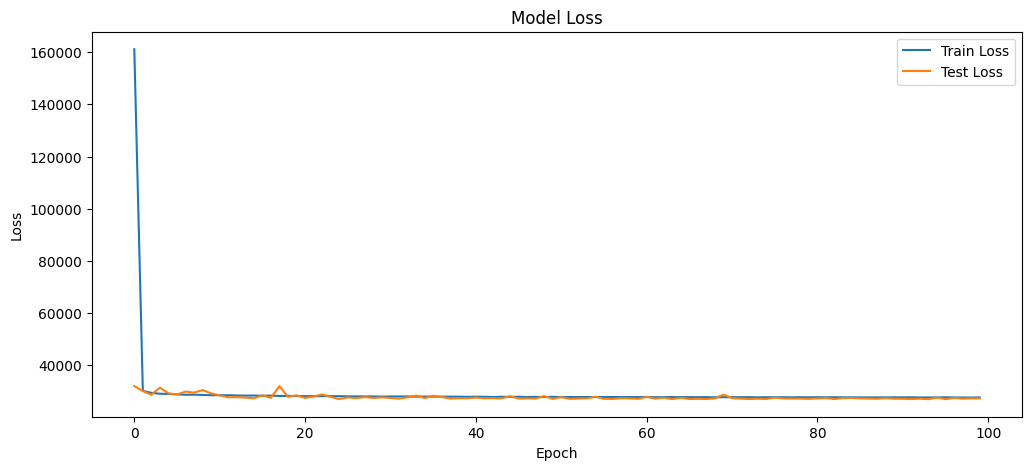

In [52]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score

# Assuming you have already loaded your DataFrame as df_train

# Prepare the data
X = df_train[['country', 'store', 'product']]  # Features
y = df_train['num_sold']  # Target

# Encode categorical variables
label_encoders = {}
for column in ['country', 'store', 'product']:  # Encode relevant categorical columns
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))
    label_encoders[column] = le

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a deep learning model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    tf.keras.layers.Dense(64, activation='relu'),  # First hidden layer
    tf.keras.layers.Dense(32, activation='relu'),  # Second hidden layer
    tf.keras.layers.Dense(16, activation='relu'),  # Third hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Absolute Error:", mae)
print("R² Score:", r2)

# Optionally, plot training & validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [55]:
# Assuming you have already loaded your test DataFrame as df_test

# Prepare the test data
X_test_data = df_test[['country', 'store', 'product']]  # Features

# Encode categorical variables in the test set
for column in ['country', 'store', 'product']:
    if column in label_encoders:
        # Use .get() to handle unseen labels gracefully
        # Use fit_transform on the training data to ensure all labels are known
        X_test_data[column] = X_test_data[column].astype(str).fillna('Unknown')
        X_test_data[column] = label_encoders[column].fit_transform(X_test_data[column])

# Scale the features
X_test_data = scaler.transform(X_test_data)

# Predict probabilities for each class
predicted_probabilities = model.predict(X_test_data)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'id': df_test['id'],  # Assuming 'id' is in the test DataFrame
    'num_sold': predicted_probabilities.flatten()  # Flatten the array to match the DataFrame structure
})

# Save the submission file
submission_df.to_csv('submission.csv', index=False)

print("Submission file created: submission.csv")

 138/3080 [>.............................] - ETA: 2s

C:\Users\talim\AppData\Local\Temp\ipykernel_20240\2709341822.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_data[column] = X_test_data[column].astype(str).fillna('Unknown')
C:\Users\talim\AppData\Local\Temp\ipykernel_20240\2709341822.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_data[column] = label_encoders[column].fit_transform(X_test_data[column])
C:\Users\talim\AppData\Local\Temp\ipykernel_20240\2709341822.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy o

3080/3080 [==============================] - 2s 741us/step
Submission file created: submission.csv


Creating a model by XGB 

In [56]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

# Assuming you have already loaded your DataFrame as df_train

# Prepare the data
X = df_train[['country', 'store', 'product']]  # Features
y = df_train['num_sold']  # Target

# Encode categorical variables
label_encoders = {}
for column in ['country', 'store', 'product']:  # Encode relevant categorical columns
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))
    label_encoders[column] = le

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the XGBoost model
model = xgb.XGBRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters
print("Best Hyperparameters:", best_params)

# Evaluate the best model
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Absolute Error for Best Model:", mae)
print("R² Score for Best Model:", r2)

C:\Users\talim\AppData\Local\Temp\ipykernel_20240\1499309835.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column].astype(str))
C:\Users\talim\AppData\Local\Temp\ipykernel_20240\1499309835.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column].astype(str))
C:\Users\talim\AppData\Local\Temp\ipykernel_20240\1499309835.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Mean Absolute Error for Best Model: 95.96578256566146
R² Score for Best Model: 0.9437197594570963
